# Handwritten Digit Prediction - Convolutional Neural Network

In [19]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## Importing MNSIT Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train[:5])

img_rows = x_train[0].shape[0]
img_cols = x_test[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [6]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

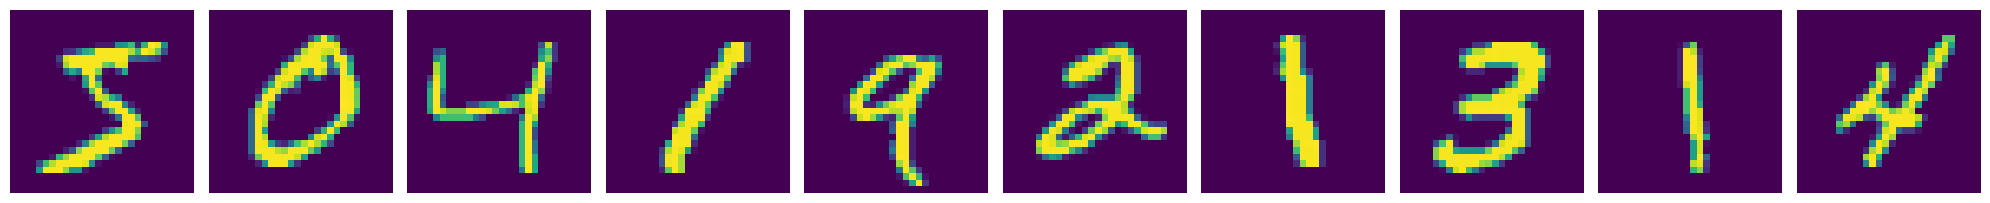

In [7]:
plotImages(x_train[:10])

## Creating the Convolutional Neural Network

In [8]:
model = Sequential([
    Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(32, (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(10)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

## Compiling the Neural Network

In [10]:
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy']
              )

## Training the Neural Network

In [11]:
batch_size = 200
epochs = 10
steps_per_epoch = 54000 // batch_size
validation_steps = 6000 // batch_size

In [12]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_split=0.1, validation_steps=validation_steps)

Epoch 1/10
270/270 [==============================] - 135s 495ms/step - loss: 0.9989 - sparse_categorical_accuracy: 0.8920 - val_loss: 0.0740 - val_sparse_categorical_accuracy: 0.9762
Epoch 2/10
270/270 [==============================] - 138s 511ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.0563 - val_sparse_categorical_accuracy: 0.9827
Epoch 3/10
270/270 [==============================] - 122s 453ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0495 - val_sparse_categorical_accuracy: 0.9860
Epoch 4/10
270/270 [==============================] - 135s 502ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.0511 - val_sparse_categorical_accuracy: 0.9853
Epoch 5/10
270/270 [==============================] - 125s 461ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0580 - val_sparse_categorical_accuracy: 0.9855
Epoch 6/10
270/270 [==============================] - 110s 407ms/step - loss: 0.

## Plotting the Accuracy of the Model

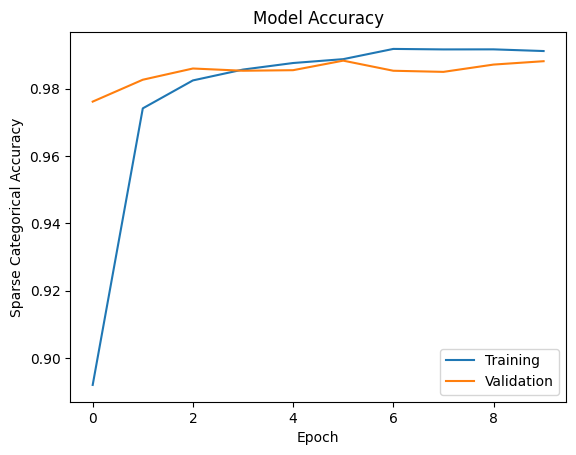

In [24]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

## Plotting the Loss of the Model

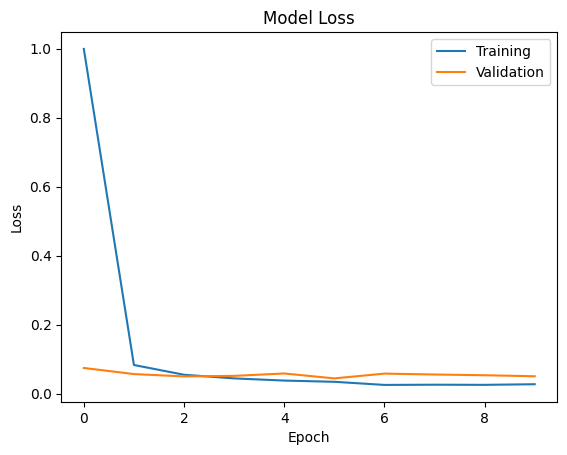

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Prediction & Evaluation

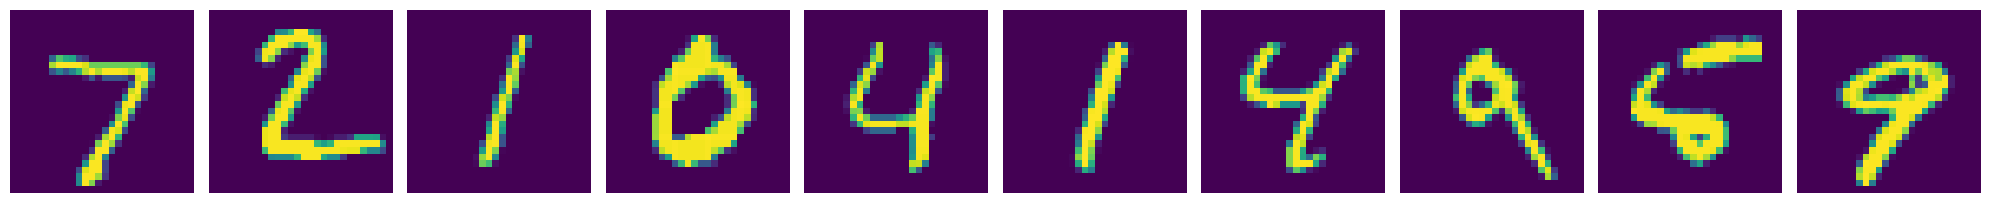

In [21]:
plotImages(x_test[:10])

In [22]:
predictions = np.argmax(model.predict(x_test[:10]), axis=-1)
print(predictions)

1/1 [==============================] - 0s 42ms/step
[7 2 1 0 4 1 4 9 5 9]


In [23]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 7s 21ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9876
[0.04732496663928032, 0.9876000285148621]
